# Daten erkunden


Python Pakete einbinden.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import matplotlib.pylab as plt

# Lageparameter in der deskriptiven Statistik

Lageparameter geben an, wo sich der größte Teil einer Stichprobe befindet. Sie werden auch als Maß der zentralen Tendenz bezeichnet.

## Beispiel: Lageparameter zu Bevölkerung und Verbrechen in den USA

Laden wir die Daten in einen pandas DataFrame und lassen uns den Inhalt anzeigen.

In [2]:
state = pd.read_csv('state.csv')
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### Wie groß ist Bevölkerungsanzahl in den Staaten der USA im Mittel?

Gängige Lageparameter sind um Antworten auf diese Frage zu erhalten sind:
* das arthmetische Mittel (= Durchschnitt)
* das getrimmte arithmetische Mittel 
* der Median (= der mittlere Wert)

`mean` und `median` können mit den pandas Methoden für DataFrames berechnet werden.. 

Der getrimmt Mittlwert erfordert die `trim_mean` Funktion in _scipy.stats_.

In [3]:
state['Population'].mean()

6162876.3

Ein Bundesstaat hat also im Mittel ca. 6 Mio Einwohner. Lassen wir uns zusätzlich die Extremwerte anzeigen.

In [4]:
state['Population'].max()

37253956

In [5]:
state['Population'].min()

563626

Welcher Staat hat die kleinste Bevölkerungsanzahl?

In [6]:
state['Population'].idxmin()

49

In [7]:
state.iloc[49,:]

State           Wyoming
Population       563626
Murder.Rate         2.7
Abbreviation         WY
Name: 49, dtype: object

In [8]:
state.iloc[state['Population'].idxmin()]

State           Wyoming
Population       563626
Murder.Rate         2.7
Abbreviation         WY
Name: 49, dtype: object

Diese Ausreißer kann man z.B. mit den getrimmten/trunkierten Mittelwert herausfiltern. Im Beispiel unten werden die oberen und unteren 10% der Werte ignoriert.

In [9]:
trim_mean(state['Population'], 0.1)

4783697.125

Dies liegt viel näher an einem weitere wichtigen Lageparameter: dem Median. hierbei wird die Reihe sortiert (hier nach Bevölkerungsanzahl) und der Wert selektiert, der genau in der Mitte liegt. 

In [10]:
state['Population'].median()

4436369.5

Um Mittelwerte für Skalen mit abhängigen Bezugsgrößen zu ermitteln kann der sogenannte gewichtete Mittelwert verwendet werden. Der gewichtete Mittelwert is im Paket numpy implementiert. Für den gewichteten Median können wir das spezialisierte paket `wquantiles` verwenden (https://pypi.org/project/wquantiles/).

In [11]:
state['Murder.Rate'].mean()


4.066

In [12]:
state['Murder.Rate'].median()


4.0

In [13]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In unserem Beispiel ergibt sich keine große Änderung da die Mordrate schon auf Morde pro 100.000 Einwohner bezogen ermittelt wird. Wäre stattdessen die Anzahl der Morde als absoluter Wert im data set, würde nur der gewichtete Mittelwert eine korrekte Analyse ergeben.

Auch der Median kann mit Hilfe von Gewichten beeinflusst werden. Im Beispiel unten, benutzen wir dazu das Paket wquantiles. 

In [14]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

# Streuungsparameter

In [15]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


## Die Standardabweichung

Dieses Maß beschreibt, wie weit die gemessenen Werte im Schnitt vom Durchschnitt (genauer: vom arithmetisches Mittel) abweichen (sic!). 

D.h. für jeden Wert wird die Differenz zum Mittelwert gebildet. Diese Differenzen werden quadriert (um zu vermeiden das sich positive und negative Differenzen ausgleichen) und aufsummiert und anschließend durch die Anzahl der Messungen -1 geteilt. Als Ergebnis erhalten wir die sogenannte Varianz. Die Quadratwurzel aus diesem Wert ist die Standardabweichung.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/96319e4ec5a4317a943c96b8a6408e71923fcc2c)

Für unser Beispiel bedeutet dies, dass die Mordrate Bundestaaten im Mittel um 1.9 Punkte vom Durchschnitt abweicht.

In [16]:
state['Murder.Rate'].std()

1.915736124302923

Der Interquartilabstand IQA (bzw. IQR) wird als Differenz zwischen den 75% und 25% Quantil berechnet. Das Ergebnis beschreibt die Breite des Korridors, in dem die mittleren 50% der Stichprobe liegen.  

In [17]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

Eine weitere Methode ist die Berechnung der mittleren absoluten Abweichung vom Median (auch MAD = median absolute deviation). Dazu können wir eine Funktion des _statsmodels_ pakets benutzen.

In [18]:
robust.scale.mad(state['Population'])
abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817

3849876.1459979336

In [19]:
robust.scale.mad(state['Murder.Rate'])
abs(state['Murder.Rate'] - state['Murder.Rate'].median()).median() / 0.6744897501960817

2.3721635496089624

## Perzentile and Boxplots
_Pandas_ bietet die Methode `quantile` für DataFrames an. Damit können flexibel verschiedenste Quantile ermittelt werden.

In [20]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [21]:

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


_Pandas_ bietet ein Auswahl an Visualisierungen für die explorative Analyse, z.B. Boxplots.

Ein Boxplot hat eine Box, die sich vom 25% bis zum 75 % Quantil erstreckt. 

Die Enden (auch Antennen oder Whisker gennant) ober- und unterhalb der Box repräsentieren das Maximum und das Minimum der Stichprobe, der Strich in der Mitte der Box zeigt den Median.

Werte die mehr als das 1,5-fache des IQA von der Box abweichen werden als Ausreißer mit Kreisen gekennzeichnet. D.h. der letzte Wert der Whisker ist der, der noch kleiner als 1,5 * IQA ist.

Werte die mehr als das 3-fache des IQA betragen werden als Extremwerte bezeichnet und i.d.R. mit "x" gekennzeichnet. Beim Standard Boxplot von _pandas_ ist dies jedoch nicht vorgesehen.

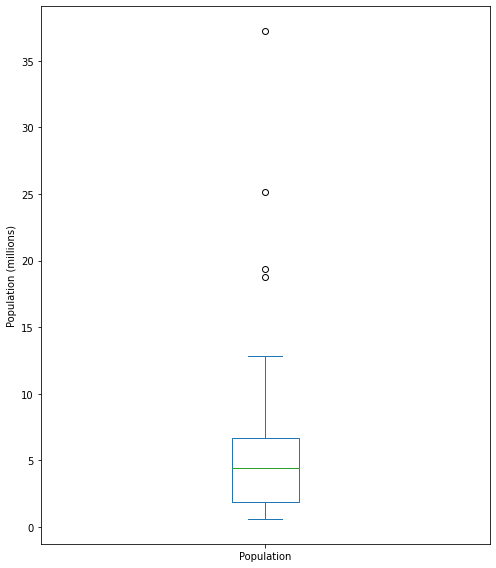

In [22]:
ax = (state['Population']/1_000_000).plot.box(figsize=(7, 8))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

## Häufigkeitsverteilungen und Histogramme
Die Methode `cut` in _pandas_ teilt Daten in Klassen(="Töpfe") auf. 

Der folgende Code erzeugt 10 gleich große Klassen aus den Bevölkerungsdaten der Staaten. Die Methode `value_counts` zeigt die Häufigkeiten für die einzelnen Klassen.

In [23]:
binnedPopulation = pd.cut(state['Population'], 10)

In [24]:
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [25]:

binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Eine etwas komplexe aber gut funktionierende Methode, diese Häufigkeitsverteilung mit den ursprünglichen Daten aus dem state DataFrame zu verknüpfen sehen Sie unten. Zuerst wird die Series binnedPopulation mit dem bisherigen DataFrame state per `concat()` verknüpft. 

In [26]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

Anschließend wird über das Ergebnis (also die Gruppen) eines `groupby()`iteriert, um die einzelnen Abkürzungen der Staaten in der Spalte "States" zusammenzuführen. In "BinRange" sind die Gruppenbezeichner, in "Count" die Anzahl der Staaten in jeder Gruppe bzw. Klasse dargestellt.

In [27]:
groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


_Pandas_ unterstützt auch die schnelle Erzeugung von Histogrammen. So kann schnell eine Häufigkeitsverteilung in einer Stichprobe sichtbargemacht werden. Per Standard werden zehn KLassen gebildet, dies lässt sich aber über die Parameter von `hist()` steuern.

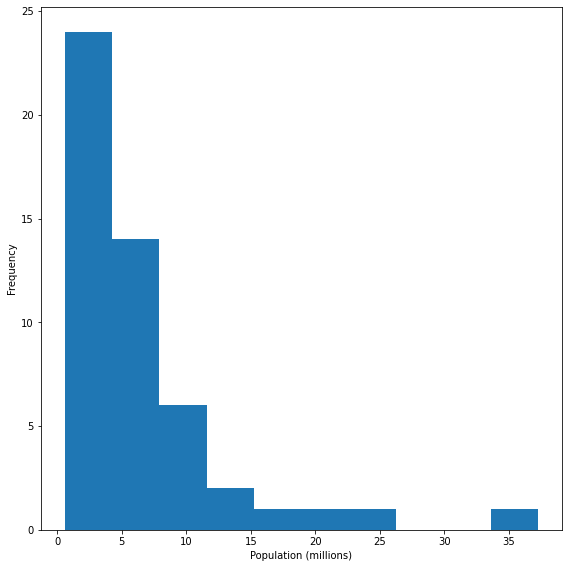

In [28]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(8, 8))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

## Dichteschätzer
Der Einsatz eines (Kern-)dichteschätzers ermöglicht eine genauere weil stetige Einschätzung der Verteilung der der Daten. Der Parameter `bw_method` steuert die Glättung der Kurve.
Siehe auch: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html

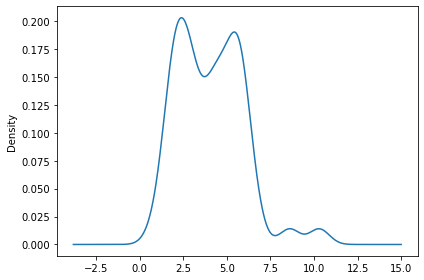

In [47]:
state['Murder.Rate'].plot.density(bw_method=0.3)

# Beispiel mit starker Glättung
#state['Murder.Rate'].plot.density(ax=ax,  bw_method=1)

plt.tight_layout()
plt.show()

Wenn Dichteschätzer und Histogramm auf einer Visualisierung zusammen angezeigt werden sollen, so wird der Plot erst in einer Variablle gesichert (hier ax) und später kombiniert.

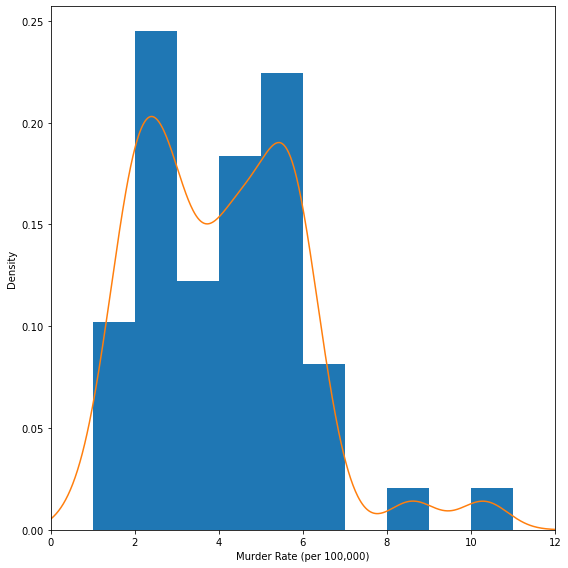

In [49]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(8, 8))
state['Murder.Rate'].plot.density(ax=ax,  bw_method=0.3)

ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()
